#模型开发流程
- 数据抽取
- 数据探索
- 建模数据准备
- 变量选择
- 模型开发与验证
- 模型部署
- 模型监督

In [1]:
import os
import sys 
import string
import pymysql
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.cross_validation as cross_validation
import sklearn.tree as tree
import sklearn.ensemble as ensemble
import sklearn.linear_model as linear_model
import sklearn.svm as svm
import sklearn.feature_selection as feature_selection
import sklearn.metrics as metrics

主要功能的帮助文档：
[matplotlib](http://matplotlib.org/1.4.3/contents.html)
[seaborn](http://web.stanford.edu/~mwaskom/software/seaborn/tutorial.html)
[pandas](http://pandas.pydata.org/pandas-docs/version/0.16.0/)
[scikit-learn](http://scikit-learn.org/stable/)

#数据抽取

In [2]:
model_data = pd.read_csv("credit_develop.csv")
model_data.head()

,target,Branch_of_Bank,Area_Classification,Age,Income,Owns_Home,Length_of_Residence,Home_Value,Recent_Address_Change,Local_Address,...,Installment_Loan,Loan_Balance,Money_Market,Money_Market_Balance,Money_Market_Credits,Mortgage,Mortgage_Balance,Credit_Card_Balance,Credit_Card_Purchases,Safety_Deposit_Box
0,0,B1,U,53,5,0,5.0,88,0,1,...,0,0,0,0.00,0,0,0,107.19,0,0
1,0,B1,S,44,44,1,9.5,115,0,1,...,0,0,0,0.00,0,0,0,391.14,1,0
2,0,B1,S,50,64,1,7.5,119,0,1,...,0,0,1,15676.59,2,0,0,0.00,0,1
3,0,B1,U,26,124,1,8.0,156,0,1,...,0,0,0,0.00,0,0,0,673.10,0,1
4,0,B1,R,46,59,1,8.0,102,0,0,...,0,0,0,0.00,0,0,0,0.00,0,0


#探索数据

- 对数据做最基础的统计探索

In [3]:
model_data.describe().T

,count,mean,std,min,25%,50%,75%,max
target,14000,0.500000,0.500018,0.00,0.0000,0.500,1.0000,1.00
Age,11365,48.060185,14.036543,16.00,38.0000,48.000,58.0000,94.00
Income,11536,40.656813,28.532530,0.00,20.0000,34.000,55.0000,233.00
Owns_Home,11666,0.544403,0.498046,0.00,0.0000,1.000,1.0000,1.00
Length_of_Residence,11536,7.024532,2.818572,0.50,5.0000,7.000,9.0000,19.50
Home_Value,11536,111.560160,22.753332,68.00,98.0000,108.000,121.0000,625.00
Recent_Address_Change,14000,0.029000,0.167812,0.00,0.0000,0.000,0.0000,1.00
Local_Address,14000,0.953429,0.210727,0.00,1.0000,1.000,1.0000,1.00
Credit_Score,13803,667.996160,40.513174,507.00,641.0000,668.000,695.0000,815.00
Age_of_Oldest_Account,13059,56.572923,6.663725,2.00,55.7000,58.700,60.5000,63.20


In [4]:
data = model_data["Credit_Score"].dropna() # 去除缺失值

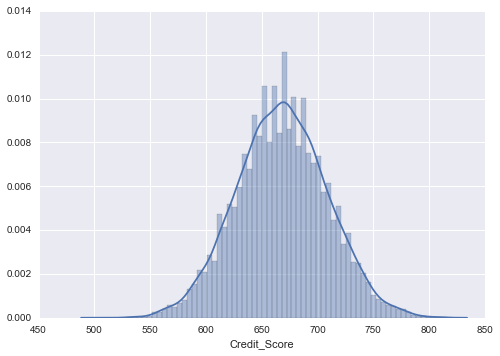

In [5]:
sns.distplot(data)

{'boxes': [<matplotlib.lines.Line2D at 0x18b89cc0>],
 'caps': [<matplotlib.lines.Line2D at 0x18b9a9b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x18ba5a58>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x18ba54e0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x18b89e10>,
  <matplotlib.lines.Line2D at 0x18b9a438>]}

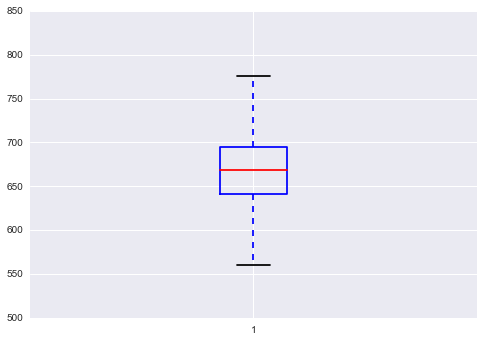

In [6]:
plt.boxplot(data)

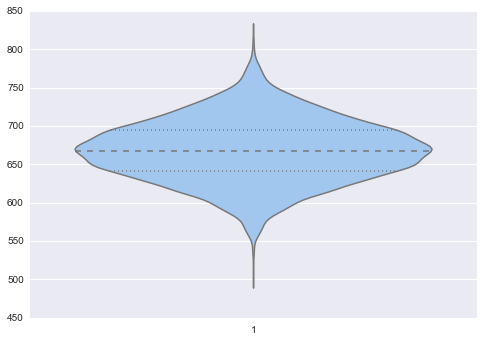

In [7]:
sns.violinplot(data, color="pastel")

- 去除重复项

In [8]:
model_data=model_data.drop_duplicates()

- 填充缺失值

In [9]:
# model_data = model_data.fillna(model_data.mean()) #用均值来填充

In [10]:
model_data = model_data.fillna(0) #用0填充

变量相似度分析，变量聚类

In [11]:
simpler = np.random.randint(0,len(model_data),size=50)

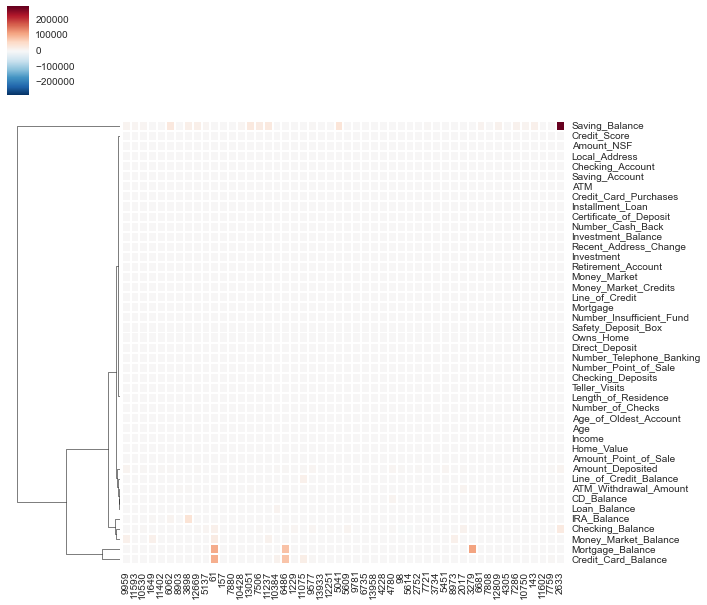

In [12]:
sns.clustermap(model_data.iloc[simpler,3:].T, col_cluster=False, row_cluster=True)

#生成模型训练/测试数据集

- 将类别变量转换为哑元变量

In [13]:
Area_Classification_dummy = pd.get_dummies(model_data["Area_Classification"],prefix="Area_Class")

In [14]:
model_data.join(Area_Classification_dummy)

,target,Branch_of_Bank,Area_Classification,Age,Income,Owns_Home,Length_of_Residence,Home_Value,Recent_Address_Change,Local_Address,...,Money_Market_Balance,Money_Market_Credits,Mortgage,Mortgage_Balance,Credit_Card_Balance,Credit_Card_Purchases,Safety_Deposit_Box,Area_Class_R,Area_Class_S,Area_Class_U
0,0,B1,U,53,5,0,5.0,88,0,1,...,0.00,0,0,0.00,107.19,0,0,0,0,1
1,0,B1,S,44,44,1,9.5,115,0,1,...,0.00,0,0,0.00,391.14,1,0,0,1,0
2,0,B1,S,50,64,1,7.5,119,0,1,...,15676.59,2,0,0.00,0.00,0,1,0,1,0
3,0,B1,U,26,124,1,8.0,156,0,1,...,0.00,0,0,0.00,673.10,0,1,0,0,1
4,0,B1,R,46,59,1,8.0,102,0,0,...,0.00,0,0,0.00,0.00,0,0,1,0,0
5,0,B1,U,0,0,0,0.0,0,1,0,...,0.00,0,0,0.00,0.00,0,0,0,0,1
6,0,B1,U,48,48,1,2.5,108,0,1,...,0.00,0,0,0.00,959.06,1,0,0,0,1
7,0,B1,S,45,11,0,7.5,128,0,1,...,0.00,0,0,0.00,0.00,0,0,0,1,0
8,0,B1,S,61,25,0,5.5,112,0,1,...,0.00,0,0,0.00,0.00,0,0,0,1,0
9,0,B1,R,77,22,1,10.0,94,0,1,...,0.00,0,0,0.00,0.00,0,1,1,0,0


In [15]:
model_data.join(pd.get_dummies(model_data["Branch_of_Bank"],prefix="Branch"))

,target,Branch_of_Bank,Area_Classification,Age,Income,Owns_Home,Length_of_Residence,Home_Value,Recent_Address_Change,Local_Address,...,Branch_B18,Branch_B19,Branch_B2,Branch_B3,Branch_B4,Branch_B5,Branch_B6,Branch_B7,Branch_B8,Branch_B9
0,0,B1,U,53,5,0,5.0,88,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,B1,S,44,44,1,9.5,115,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,B1,S,50,64,1,7.5,119,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,B1,U,26,124,1,8.0,156,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,B1,R,46,59,1,8.0,102,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,B1,U,0,0,0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,B1,U,48,48,1,2.5,108,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0,B1,S,45,11,0,7.5,128,0,1,...,0,0,0,0,0,0,0,0,0,0
8,0,B1,S,61,25,0,5.5,112,0,1,...,0,0,0,0,0,0,0,0,0,0
9,0,B1,R,77,22,1,10.0,94,0,1,...,0,0,0,0,0,0,0,0,0,0


- 分成目标变量和应变量

In [16]:
target = model_data["target"]
pd.crosstab(target,"target")
data = model_data.ix[ :,'Age':]

- 分成训练集和测试集，比例为6:4

In [17]:
train_data, test_data, train_target, test_target = cross_validation.train_test_split(data, target, test_size=0.4, random_state=0)

#筛选变量

- 计算每一个X变量和Y变量的线性相关系数

In [18]:
corr_matrix = model_data.corr(method='pearson')
corr_matrix = corr_matrix.abs()

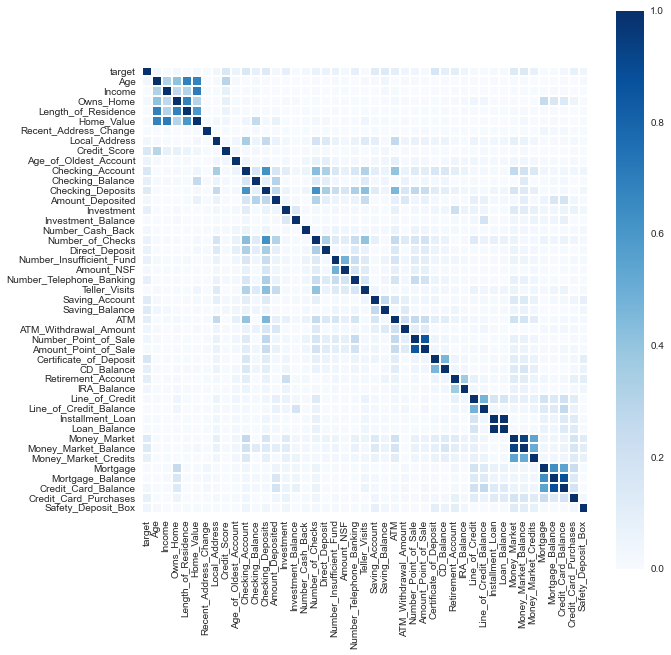

In [19]:
sns.set(rc={"figure.figsize": (10, 10)})
sns.heatmap(corr_matrix,square=True,cmap="Blues")

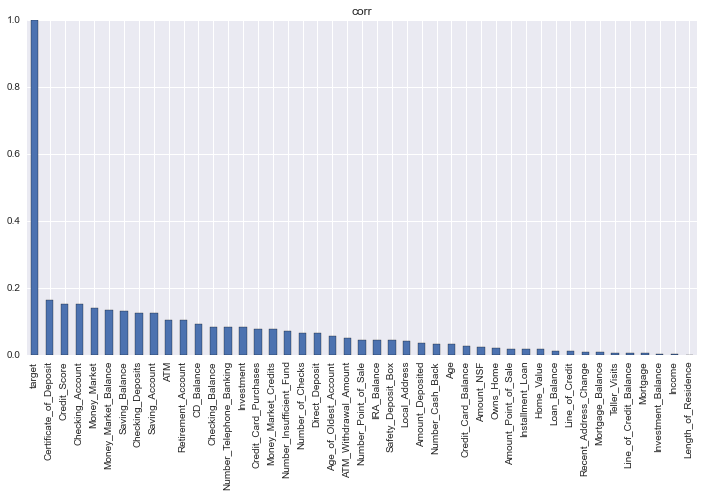

In [20]:
corr = model_data.corr(method='pearson').ix["target"].abs()
corr.sort(ascending=False)
corr.plot(kind="bar",title="corr",figsize=[12,6])

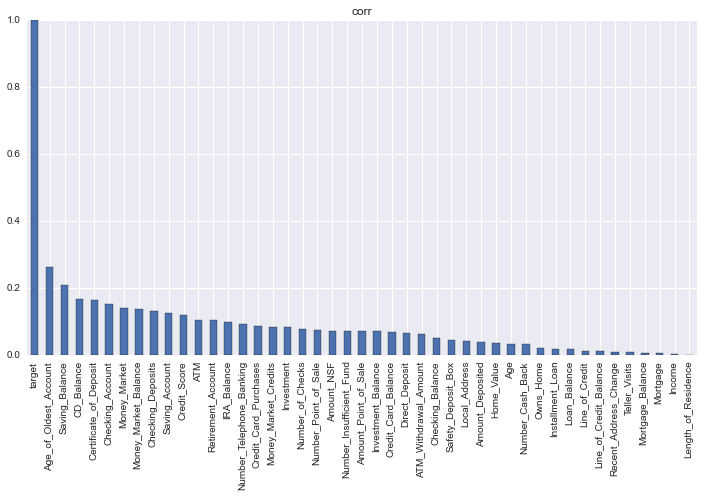

In [21]:
corr = model_data.corr(method='spearman').ix["target"].abs()
corr.sort(ascending=False)
corr.plot(kind="bar",title="corr",figsize=[12,6])

- 使用随机森林方法来选择模型模型变量

In [22]:
rfc = ensemble.RandomForestClassifier(criterion='entropy', n_estimators=3, max_features=0.5, min_samples_split=5)

In [23]:
rfc_model = rfc.fit(train_data, train_target)

In [24]:
rfc_model.feature_importances_

array([ 0.03975285,  0.03860345,  0.00618828,  0.04121298,  0.03770435,
        0.00214653,  0.00315945,  0.07947124,  0.2669818 ,  0.01557767,
        0.07225615,  0.01491828,  0.04468999,  0.00439429,  0.00212764,
        0.00038777,  0.0257139 ,  0.00538107,  0.00098648,  0.00492435,
        0.00771507,  0.01916017,  0.0030356 ,  0.08126932,  0.00383087,
        0.03330186,  0.00598653,  0.00975043,  0.00262373,  0.01840847,
        0.00454638,  0.01137386,  0.0032297 ,  0.00555697,  0.00127506,
        0.00333086,  0.01008836,  0.02523793,  0.00169995,  0.00103907,
        0.00242611,  0.02604811,  0.00760889,  0.00487816])

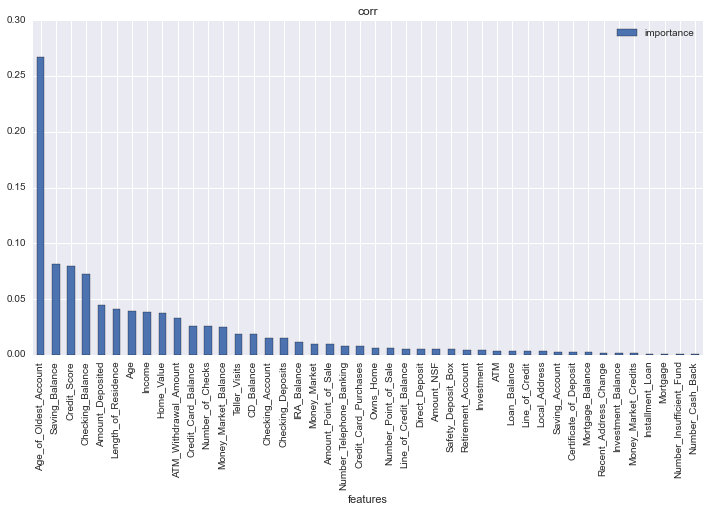

In [25]:
rfc_fi = pd.DataFrame()
rfc_fi["features"] = list(data.columns)
rfc_fi["importance"] = list(rfc_model.feature_importances_)
rfc_fi=rfc_fi.set_index("features",drop=True)
rfc_fi.sort_index(by="importance",ascending=False).plot(kind="bar",title="corr",figsize=[12,6])

- 双变量分析

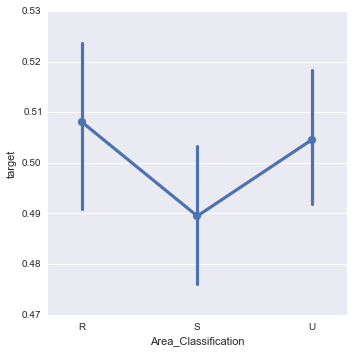

In [26]:
sns.factorplot("Area_Classification", "target", data=model_data)

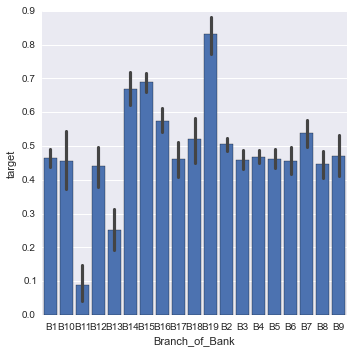

In [27]:
sns.factorplot("Branch_of_Bank", "target", data=model_data,kind='bar')

In [28]:
bins = [-1,0,50,55,60,100]

In [29]:
model_data["Age_of_Oldest_Account_seg"] = pd.cut(model_data["Age_of_Oldest_Account"],bins,right=True)

In [30]:
var_percent = model_data['target'].groupby(model_data["Age_of_Oldest_Account_seg"]).mean()

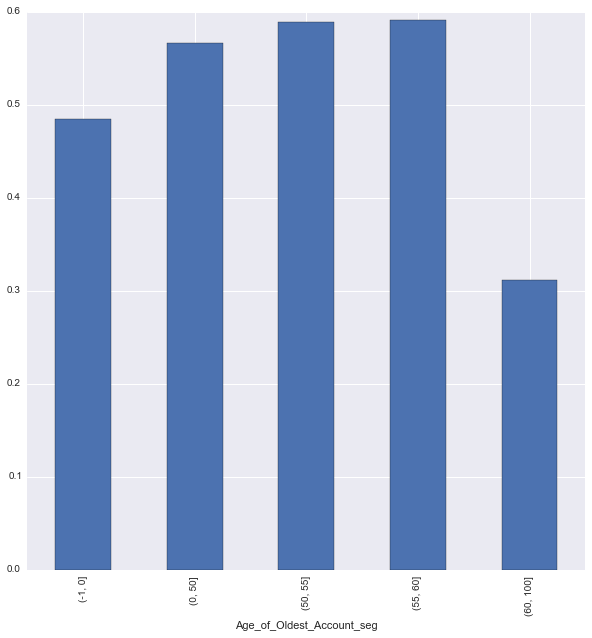

In [31]:
var_percent.plot(kind='bar')

- 用IV值做变量筛选

In [32]:
percent_matrix = model_data["target"].groupby(model_data["Area_Classification"]).mean()

In [33]:
bad_of_all = model_data["target"].groupby(model_data["Area_Classification"]).sum() / model_data["target"].sum()

In [34]:
good_of_all = (model_data["target"]==0).groupby(model_data["Area_Classification"]).sum() / (model_data["target"]==0).sum()

In [35]:
bad_percent = model_data["target"].mean()

In [36]:
woe_matrix = np.log(percent_matrix/bad_percent)

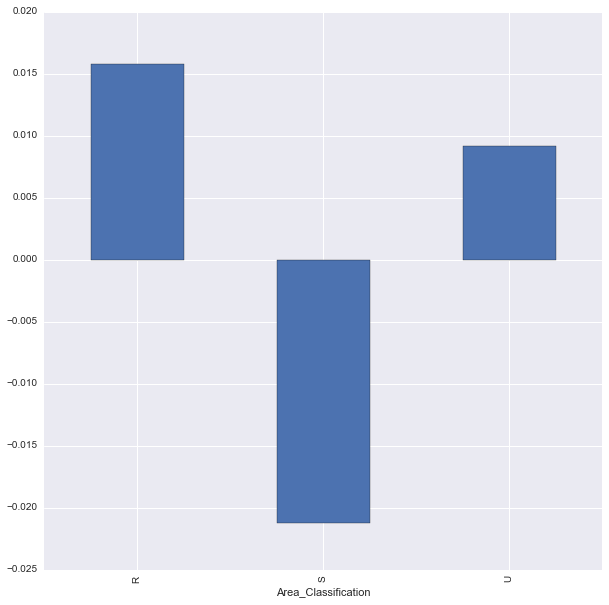

In [37]:
woe_matrix.plot(kind="bar")

In [38]:
iv = ((bad_of_all - good_of_all) * woe_matrix).sum()

#模型训练

- 使用原始变量进行logistic回归

In [39]:
logistic_model = linear_model.LogisticRegression()
logistic_model.fit(train_data, train_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [40]:
test_est = logistic_model.predict(test_data)
train_est = logistic_model.predict(train_data)

In [41]:
test_est_p = logistic_model.predict_proba(test_data)[:,1]
train_est_p = logistic_model.predict_proba(train_data)[:,1]

In [42]:
print metrics.classification_report(test_target, test_est)

             precision    recall  f1-score   support

          0       0.68      0.61      0.64      2825
          1       0.64      0.71      0.67      2775

avg / total       0.66      0.66      0.66      5600



In [43]:
print metrics.classification_report(train_target, train_est)

             precision    recall  f1-score   support

          0       0.67      0.63      0.65      4175
          1       0.66      0.70      0.68      4225

avg / total       0.67      0.67      0.66      8400



In [44]:
metrics.zero_one_loss(test_target, test_est)

0.34053571428571427

In [45]:
metrics.zero_one_loss(train_target, train_est)

0.33476190476190482

- 目标样本和非目标样本的分数分布

In [46]:
red, blue = sns.color_palette("Set1",2)

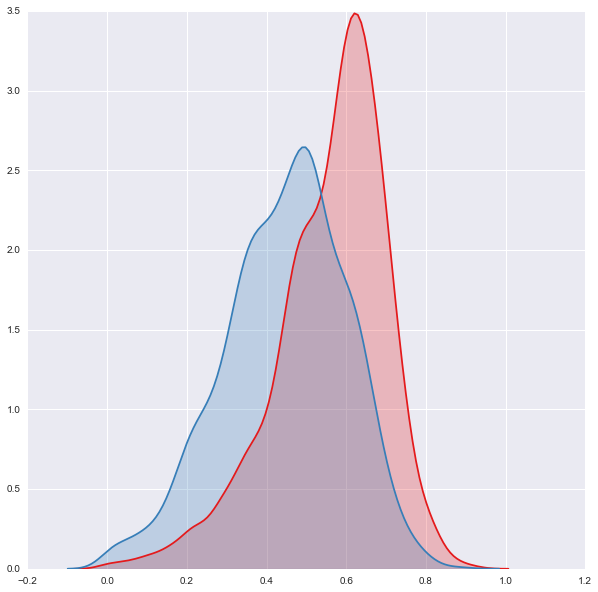

In [47]:
sns.kdeplot(test_est_p[test_target==1], shade=True, color=red)
sns.kdeplot(test_est_p[test_target==0], shade=True, color=blue)

- ROC曲线

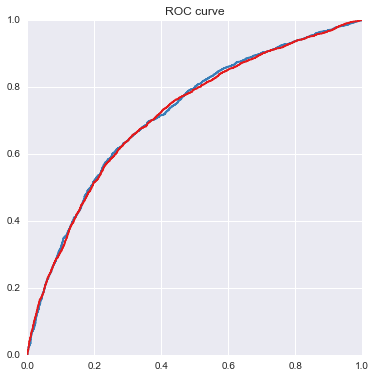

In [48]:
fpr_test, tpr_test, th_test = metrics.roc_curve(test_target, test_est_p)
fpr_train, tpr_train, th_train = metrics.roc_curve(train_target, train_est_p)
plt.figure(figsize=[6,6])
plt.plot(fpr_test, tpr_test, color=blue)
plt.plot(fpr_train, tpr_train, color=red)
plt.title('ROC curve')

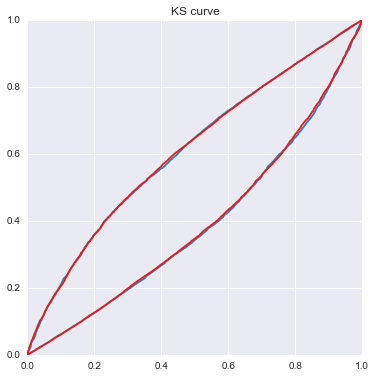

In [49]:
test_x_axis = np.arange(len(fpr_test))/float(len(fpr_test))
train_x_axis = np.arange(len(fpr_train))/float(len(fpr_train))
plt.figure(figsize=[6,6])
plt.plot(fpr_test, test_x_axis, color=blue)
plt.plot(tpr_test, test_x_axis, color=blue)
plt.plot(fpr_train, train_x_axis, color=red)
plt.plot(tpr_train, train_x_axis, color=red)
plt.title('KS curve')

#模型永久化

In [50]:
import pickle as pickle
model_file = open(r'D:\logitic.model', 'wb')
pickle.dump(logistic_model, model_file)
model_file.close()

In [51]:
model_load_file = open(r'D:\logitic.model', 'rb')
model_load = pickle.load(model_load_file)
model_load_file.close()

In [52]:
test_est_load = model_load.predict(test_data)

In [53]:
pd.crosstab(test_est_load,test_est)

col_0,0,1
row_0,,
0,2530,0
1,0,3070


#模型的监督

- 分数分布稳定性

- 变量判别能力稳定性

- 变量分布稳定性

#其他机器学习算法

In [54]:
lr = linear_model.LogisticRegression()
lr_scores = cross_validation.cross_val_score(lr, train_data, train_target, cv=5)
print("logistic regression accuracy:")
print(lr_scores)

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=5)
clf_scores = cross_validation.cross_val_score(clf, train_data, train_target, cv=5)
print("decision tree accuracy:")
print(clf_scores)

rfc = ensemble.RandomForestClassifier(criterion='entropy', n_estimators=3, max_features=0.5, min_samples_split=5)
rfc_scores = cross_validation.cross_val_score(rfc, train_data, train_target, cv=5)
print("random forest accuracy:")
print(rfc_scores)

etc = ensemble.ExtraTreesClassifier(criterion='entropy', n_estimators=3, max_features=0.6, min_samples_split=5)
etc_scores = cross_validation.cross_val_score(etc, train_data, train_target, cv=5)
print("extra trees accuracy:")
print(etc_scores)

gbc = ensemble.GradientBoostingClassifier()
gbc_scores = cross_validation.cross_val_score(gbc, train_data, train_target, cv=5)
print("gradient boosting accuracy:")
print(gbc_scores)

svc = svm.SVC()
svc_scores = cross_validation.cross_val_score(svc, train_data, train_target, cv=5)
print("svm classifier accuracy:")
print(svc_scores)

abc = ensemble. AdaBoostClassifier(n_estimators=100)
abc_scores = cross_validation.cross_val_score(abc, train_data, train_target, cv=5)
print("abc classifier accuracy:")
print(abc_scores)

logistic regression accuracy:
[ 0.66785714  0.65416667  0.65357143  0.65535714  0.65833333]
decision tree accuracy:
[ 0.74107143  0.75654762  0.73988095  0.73035714  0.73690476]
random forest accuracy:
[ 0.7125      0.72142857  0.71190476  0.72083333  0.68809524]
extra trees accuracy:
[ 0.66964286  0.70714286  0.6827381   0.67738095  0.67797619]
gradient boosting accuracy:
[ 0.78214286  0.78035714  0.77202381  0.76071429  0.75119048]
svm classifier accuracy:
[ 0.50297619  0.50595238  0.50654762  0.50297619  0.50297619]
abc classifier accuracy:
[ 0.76785714  0.76488095  0.76904762  0.74940476  0.75      ]


python数据分析的参考书籍：
[《利用Python进行数据分析》](http://www.amazon.cn/%E5%88%A9%E7%94%A8Python%E8%BF%9B%E8%A1%8C%E6%95%B0%E6%8D%AE%E5%88%86%E6%9E%90-%E9%BA%A6%E9%87%91%E5%B0%BC/dp/B00GHGZLWS/ref=sr_1_1?ie=UTF8&qid=1430098463&sr=8-1&keywords=python%E6%95%B0%E6%8D%AE%E5%88%86%E6%9E%90)
[《机器学习实战》](http://www.amazon.cn/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E5%AE%9E%E6%88%98-%E5%93%88%E6%9E%97%E9%A1%BF/dp/B00D747PTK/ref=sr_1_4?ie=UTF8&qid=1430098463&sr=8-4&keywords=python%E6%95%B0%E6%8D%AE%E5%88%86%E6%9E%90)
[《机器学习系统设计》](http://www.amazon.cn/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E7%B3%BB%E7%BB%9F%E8%AE%BE%E8%AE%A1-%E9%87%8C%E5%BD%BB%E7%89%B9/dp/B00KYXKIDM/ref=sr_1_6?ie=UTF8&qid=1430098463&sr=8-6&keywords=python%E6%95%B0%E6%8D%AE%E5%88%86%E6%9E%90)
[《集体智慧编程》](http://www.amazon.cn/s/ref=nb_sb_noss?__mk_zh_CN=%E4%BA%9A%E9%A9%AC%E9%80%8A%E7%BD%91%E7%AB%99&url=search-alias%3Daps&field-keywords=%E9%9B%86%E4%BD%93%E6%99%BA%E6%85%A7%E7%BC%96%E7%A8%8B&sprefix=jitizh%2Caps)

